## Visualizing the Age of Presidents of the United States

## Step 1: Gathering Data

The source of the data used in this notebook is from [this Wikipedia article](https://en.wikipedia.org/wiki/List_of_presidents_of_the_United_States_by_age).



In [7]:
from pandas import read_html

url: str = 'https://en.wikipedia.org/wiki/List_of_presidents_of_the_United_States_by_age'

df = (
    read_html(url)[0]
    .droplevel(0, axis = 1)
    .dropna(how = 'all')
    .drop(columns = ['No.'])
)

df.to_csv('data/presidents_age.csv', index = False)

In [8]:
# Previewing the dataframe

df.head(10)

,President,Born,Age at start of presidency,Age at end of presidency,Post-presidency timespan,Died,Age
0,George Washington,"Feb 22, 1732[a]","57 years, 67 days Apr 30, 1789","65 years, 10 days Mar 4, 1797","2 years, 285 days","Dec 14, 1799","67 years, 295 days"
1,John Adams,"Oct 30, 1735[a]","61 years, 125 days Mar 4, 1797","65 years, 125 days Mar 4, 1801","25 years, 122 days","Jul 4, 1826","90 years, 247 days"
2,Thomas Jefferson,"Apr 13, 1743[a]","57 years, 325 days Mar 4, 1801","65 years, 325 days Mar 4, 1809","17 years, 122 days","Jul 4, 1826","83 years, 82 days"
3,James Madison,"Mar 16, 1751[a]","57 years, 353 days Mar 4, 1809","65 years, 353 days Mar 4, 1817","19 years, 116 days","Jun 28, 1836","85 years, 104 days"
4,James Monroe,"Apr 28, 1758","58 years, 310 days Mar 4, 1817","66 years, 310 days Mar 4, 1825","6 years, 122 days","Jul 4, 1831","73 years, 67 days"
5,John Quincy Adams,"Jul 11, 1767","57 years, 236 days Mar 4, 1825","61 years, 236 days Mar 4, 1829","18 years, 356 days","Feb 23, 1848","80 years, 227 days"
6,Andrew Jackson,"Mar 15, 1767","61 years, 354 days Mar 4, 1829","69 years, 354 days Mar 4, 1837","8 years, 96 days","Jun 8, 1845","78 years, 85 days"
7,Martin Van Buren,"Dec 5, 1782","54 years, 89 days Mar 4, 1837","58 years, 89 days Mar 4, 1841","21 years, 142 days","Jul 24, 1862","79 years, 231 days"
8,William Henry Harrison,"Feb 9, 1773","68 years, 23 days Mar 4, 1841","68 years, 54 days Apr 4, 1841",0 days[b],"Apr 4, 1841","68 years, 54 days"
9,John Tyler,"Mar 29, 1790","51 years, 6 days Apr 4, 1841","54 years, 340 days Mar 4, 1845","16 years, 320 days","Jan 18, 1862","71 years, 295 days"


In [9]:
from datetime import date
from polars import read_csv, col

snapshot_date = date(2024, 5, 20)   # today's date

df = read_csv('data/presidents_age.csv')

display(
    df.sample(7, seed = 4),
    df[0, 'Age at end of presidency'],
)


President,Born,Age at start of presidency,Age at end of presidency,Post-presidency timespan,Died,Age
str,str,str,str,str,str,str
"""Theodore Roosevelt""","""Oct 27, 1858""","""42 years, 322 days Sep 14, 190…","""50 years, 128 days Mar 4, 1909""","""9 years, 308 days""","""Jan 6, 1919""","""60 years, 71 days"""
"""Millard Fillmore""","""Jan 7, 1800""","""50 years, 183 days Jul 9, 1850""","""53 years, 56 days Mar 4, 1853""","""21 years, 4 days""","""Mar 8, 1874""","""74 years, 60 days"""
"""Bill Clinton""","""Aug 19, 1946""","""46 years, 154 days Jan 20, 199…","""54 years, 154 days Jan 20, 200…","""23 years, 121 days""","""–""","""77 years, 275 days"""
"""Harry S. Truman""","""May 8, 1884""","""60 years, 339 days Apr 12, 194…","""68 years, 257 days Jan 20, 195…","""19 years, 341 days""","""Dec 26, 1972""","""88 years, 232 days"""
"""William Henry Harrison""","""Feb 9, 1773""","""68 years, 23 days Mar 4, 1841""","""68 years, 54 days Apr 4, 1841""","""0 days[b]""","""Apr 4, 1841""","""68 years, 54 days"""
"""Joe Biden""","""Nov 20, 1942""","""78 years, 61 days Jan 20, 2021""","""(incumbent)""","""(incumbent)""","""–""","""81 years, 182 days"""
"""John F. Kennedy""","""May 29, 1917""","""43 years, 236 days Jan 20, 196…","""46 years, 177 days Nov 22, 196…","""0 days[b]""","""Nov 22, 1963""","""46 years, 177 days"""


'65\xa0years, 10\xa0days Mar 4, 1797'

## Cleaning

Cleaning tasks carried out:

1. Parsing of dates. Currently, dates seem to be formatted in {month abbreviation} {date}, {year}.
2. The column `Age at start of presidency` has the president's age as well as date of inauguration. 
3. Joe Biden has `"(incumbent)"` which signals he's the current president. This is handled via nulls.
4. Missing data seems to be indicated by "-"
5. There are some embedded footnotes as can be seen from the `[b]` occurrences.

In [10]:
from datetime import date
from polars import String, col, when, selectors as cs

def sequential(df, *expressions):
    """Sequence expressions to apply them in order.
    
    uses the eager API to avoid repeated calls to `with_columns`
    """
    for expr in expressions:
        df = df.with_columns(expr)
    return df

presidents = (
    df
    .pipe(sequential,
        col(String).str.replace('\[.*\]', ''),         # remove footnotes

        when(col(String).is_in(['–', '(incumbent)']))  # Null out string data
            .then(None).otherwise(col(String))
            .name.keep(),

        cs.starts_with('Age at')  # Age at … → Start/End of Presidency
            .str.replace('\d+\syears, \d+\sdays\s+', '')
            .name.map(lambda name: name.removeprefix('Age at').strip().capitalize()),
     )
    .select( # filter down to the columns we want for our analysis
        col('President'),
        cs.matches('^(Start|End) of').str.to_date('%b %d, %Y', strict=False),
        col('Born').str.to_date('%b %d, %Y'),
        col('Died').str.to_date('%b %d, %Y', strict=False),
    )
)

presidents.sample(7, seed=4)

<>:16: SyntaxWarning: invalid escape sequence '\['
<>:23: SyntaxWarning: invalid escape sequence '\d'
<>:16: SyntaxWarning: invalid escape sequence '\['
<>:23: SyntaxWarning: invalid escape sequence '\d'
/var/folders/z6/mhv044k52r38pf74f9w6gkjc0000gn/T/ipykernel_81350/1208758273.py:16: SyntaxWarning: invalid escape sequence '\['
  col(String).str.replace('\[.*\]', ''),         # remove footnotes
/var/folders/z6/mhv044k52r38pf74f9w6gkjc0000gn/T/ipykernel_81350/1208758273.py:23: SyntaxWarning: invalid escape sequence '\d'
  .str.replace('\d+\syears, \d+\sdays\s+', '')


President,Start of presidency,End of presidency,Born,Died
str,date,date,date,date
"""Theodore Roosevelt""",1901-09-14,1909-03-04,1858-10-27,1919-01-06
"""Millard Fillmore""",1850-07-09,1853-03-04,1800-01-07,1874-03-08
"""Bill Clinton""",1993-01-20,2001-01-20,1946-08-19,null
"""Harry S. Truman""",1945-04-12,1953-01-20,1884-05-08,1972-12-26
"""William Henry Harrison""",1841-03-04,1841-04-04,1773-02-09,1841-04-04
"""Joe Biden""",2021-01-20,null,1942-11-20,null
"""John F. Kennedy""",1961-01-20,1963-11-22,1917-05-29,1963-11-22


## Derivations

## Colors

In [12]:
from polars import coalesce 

assassinated = [
    'Abraham Lincoln', 'James A. Garfield',
    'William McKinley', 'John F. Kennedy'
]

# code to create the color mapping on the left side of the chart

# nesting these colors using polar's coalesce method

circle_exprs = { # order matters for color coalesce
    'Still Alive': (
        col('Died').is_null(),
        '#aa85fd',
    ),
    'Assassinated in Office': (
        col('President').is_in(assassinated).fill_null(False),
        '#f183bb'
    ),
    'Died in Office': (
        col('Died').le(col('End of presidency')).fill_null(False),
        '#f8b66a',
    ),
    'Died of Natural Causes': (
        when(col('Died').is_not_null())
            .then(~col('President').is_in(assassinated))
            .otherwise(False),
        '#dcdcdc'
    ),
}

colors = (
    presidents.select(
        **{name: expr for name, (expr, _) in circle_exprs.items()}
    )
    .with_columns(
        coalesce(
            col(c).replace({True: color, False: None})
            for c, (_, color) in circle_exprs.items()
        ).alias('color')
    )
)

colors.sample(5, seed = 0)

Still Alive,Assassinated in Office,Died in Office,Died of Natural Causes,color
bool,bool,bool,bool,str
false,false,false,true,"""#dcdcdc"""
true,false,false,false,"""#aa85fd"""
false,false,false,true,"""#dcdcdc"""
false,false,false,true,"""#dcdcdc"""
true,false,false,false,"""#aa85fd"""


## Adding Age at Start/End of Presidency and Term Length (Years)

In [13]:
from datetime import date

def duration_since(current, begin):
    return (
        (col(current).fill_null(date.today()) - col(begin))
        .dt.total_days() / 365 # assuming number of days in a year
    )

presidents = presidents.with_columns(**{
    'Age at Start of Presidency': duration_since('Start of presidency', 'Born'),
    'Age at End of Presidency': duration_since('End of presidency', 'Born'),
    'Term Length': duration_since('End of presidency', 'Start of presidency'),
    'color': colors['color'], # carry the `'color'` column. it is already aligned.
})

presidents.sample(7, seed=4)

President,Start of presidency,End of presidency,Born,Died,Age at Start of Presidency,Age at End of Presidency,Term Length,color
str,date,date,date,date,f64,f64,f64,str
"""Theodore Roosevelt""",1901-09-14,1909-03-04,1858-10-27,1919-01-06,42.909589,50.383562,7.473973,"""#dcdcdc"""
"""Millard Fillmore""",1850-07-09,1853-03-04,1800-01-07,1874-03-08,50.534247,53.189041,2.654795,"""#dcdcdc"""
"""Bill Clinton""",1993-01-20,2001-01-20,1946-08-19,null,46.454795,54.460274,8.005479,"""#aa85fd"""
"""Harry S. Truman""",1945-04-12,1953-01-20,1884-05-08,1972-12-26,60.967123,68.747945,7.780822,"""#dcdcdc"""
"""William Henry Harrison""",1841-03-04,1841-04-04,1773-02-09,1841-04-04,68.106849,68.191781,0.084932,"""#f8b66a"""
"""Joe Biden""",2021-01-20,null,1942-11-20,null,78.221918,81.553425,3.331507,"""#aa85fd"""
"""John F. Kennedy""",1961-01-20,1963-11-22,1917-05-29,1963-11-22,43.676712,46.515068,2.838356,"""#f183bb"""


## Creating the Visualization

In [14]:
# matplotlib configurations

%matplotlib agg
%config InlineBackend.print_figure_kwargs = {'bbox_inches': None}

### Setting up the Horizontal Bars

In [15]:
from matplotlib.pyplot import subplots, rc 

from datetime import date

In [16]:
p  = presidents

In [18]:
rc('font', size = 18)
rc('axes.spines', top = False, right = False, bottom = False, left = False)

fig, ax = subplots(figsize = (18, 18), gridspec_kw = {'left': .1, 'bottom': .1})

In [19]:
age_bc = ax.barh(
    y = p['President'],
    width = (p['Died'].fill_null(date.today()) - p['Born']).dt.total_days() / 365,
    fc = '#aee3fe',
    ec = 'none',
    height = 0.9,
)

inoffice_bc = ax.barh(
    y = p['President'],
    left = p['Age at Start of Presidency'],
    width = p['Term Length'],
    height = age_bc[0].get_height(),
    fc = "#ff0201",
)

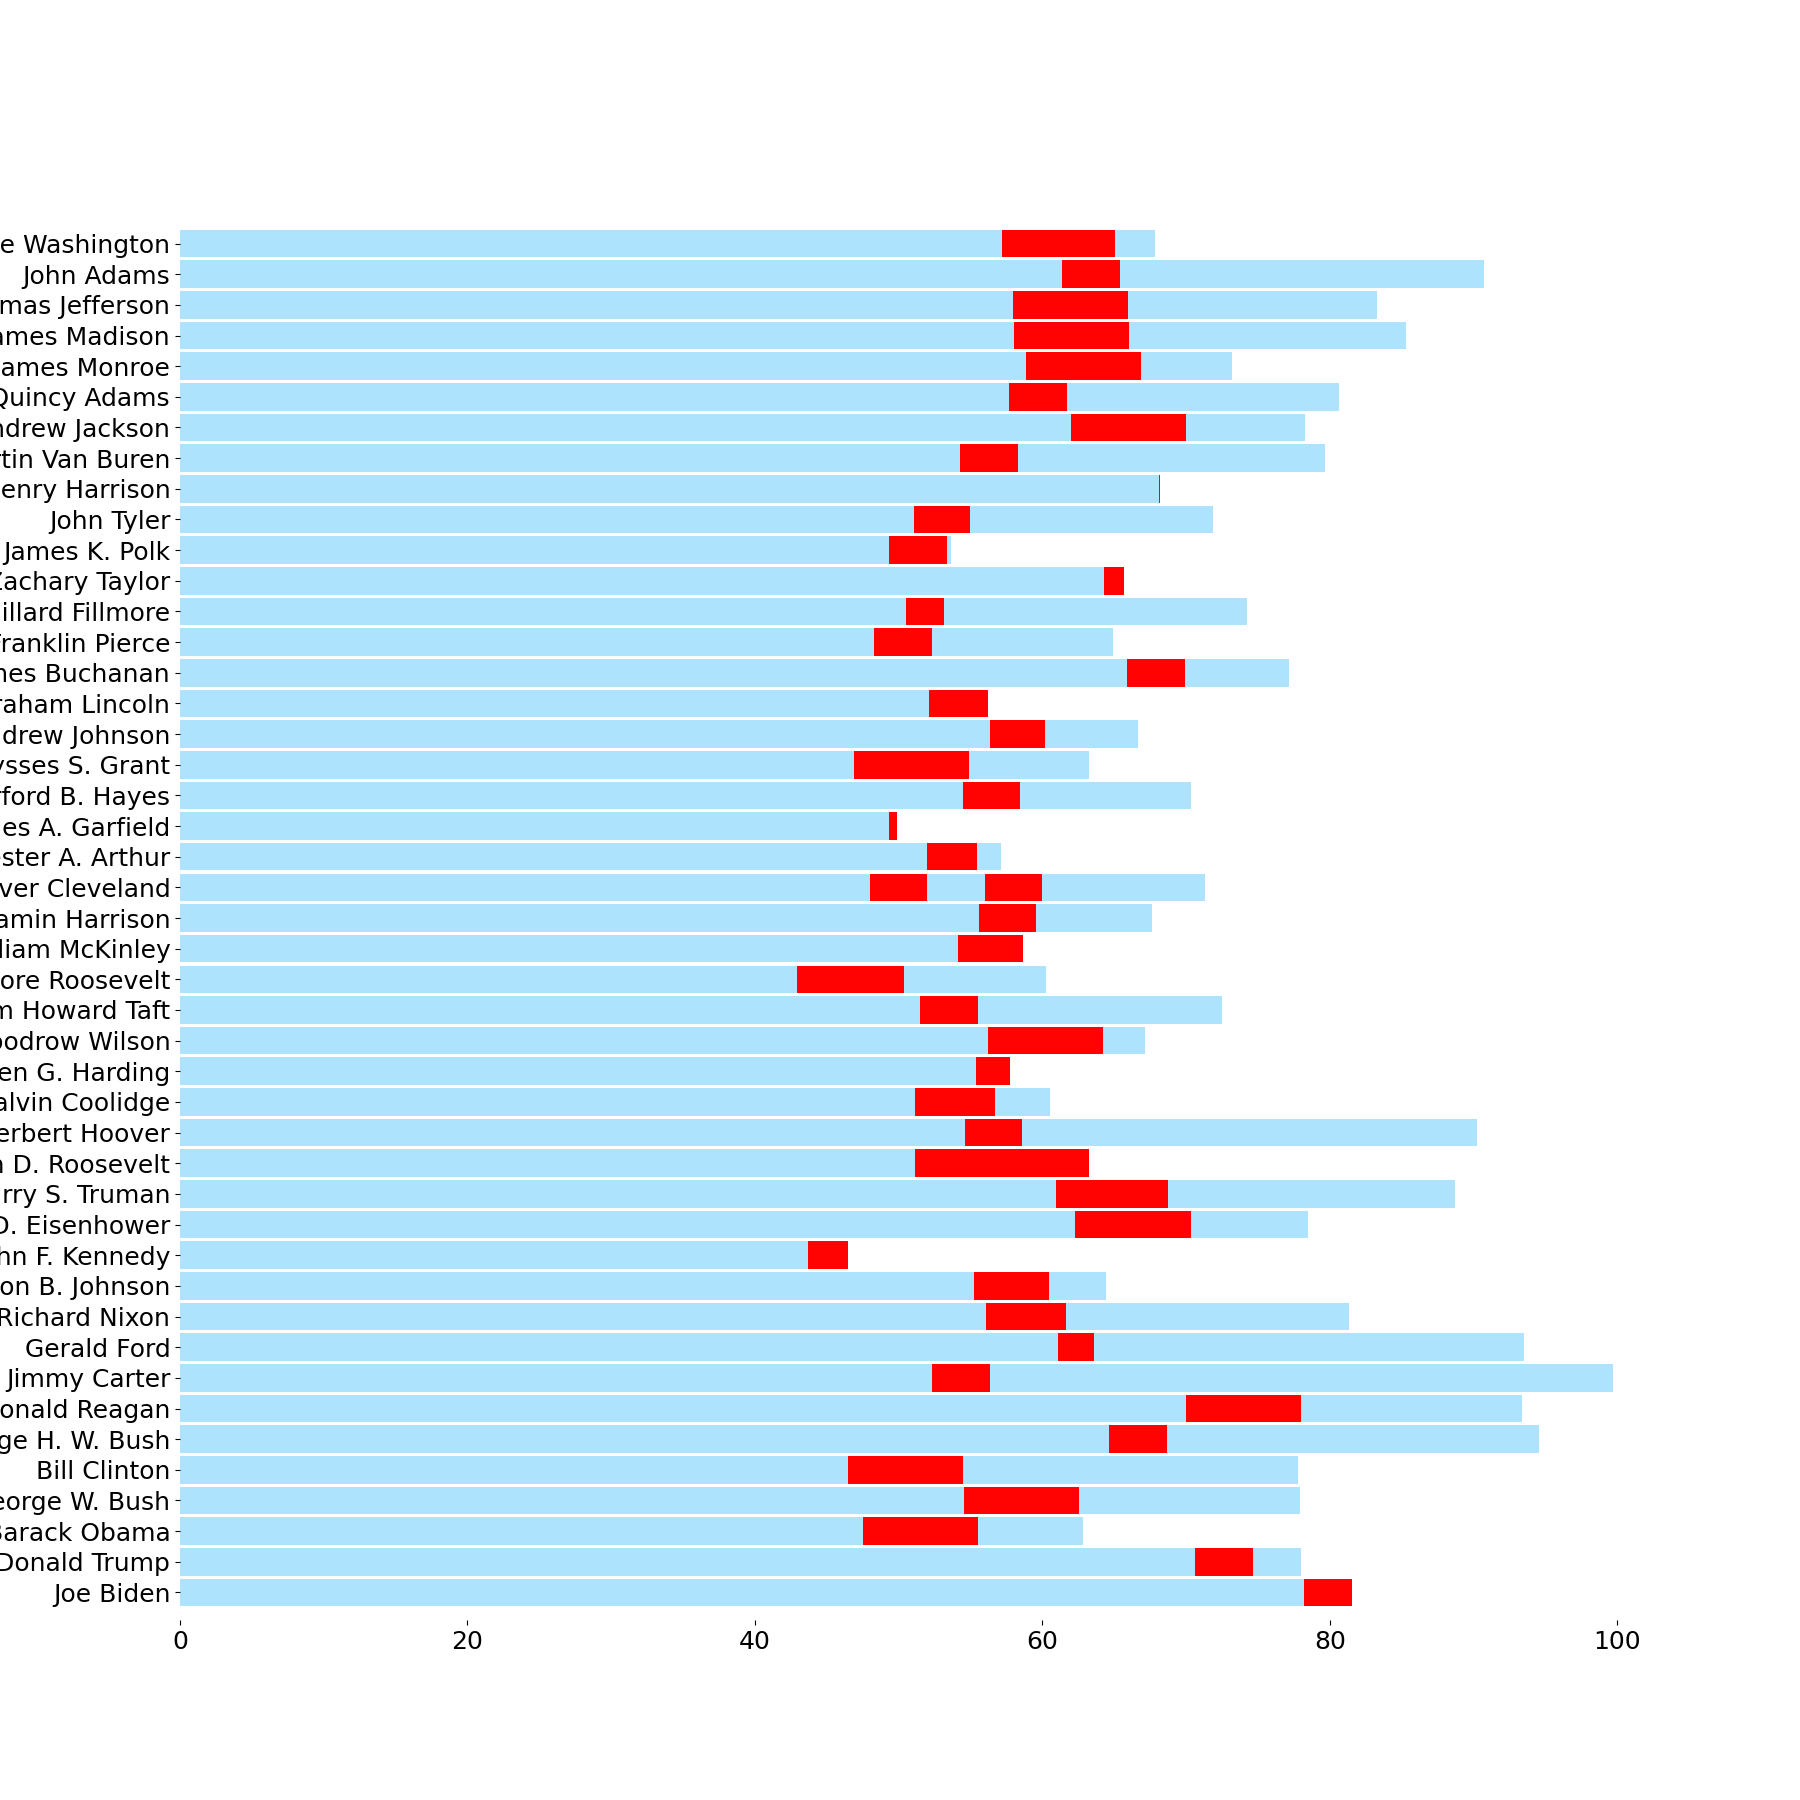

In [20]:
ax.invert_yaxis()
ax.margins(y = 0.01, x = 0.005)

display(fig)

### Y-Axis Bar Labels

In [21]:
from math import floor
from matplotlib.pyplot import setp
from matplotlib.ticker import MultipleLocator

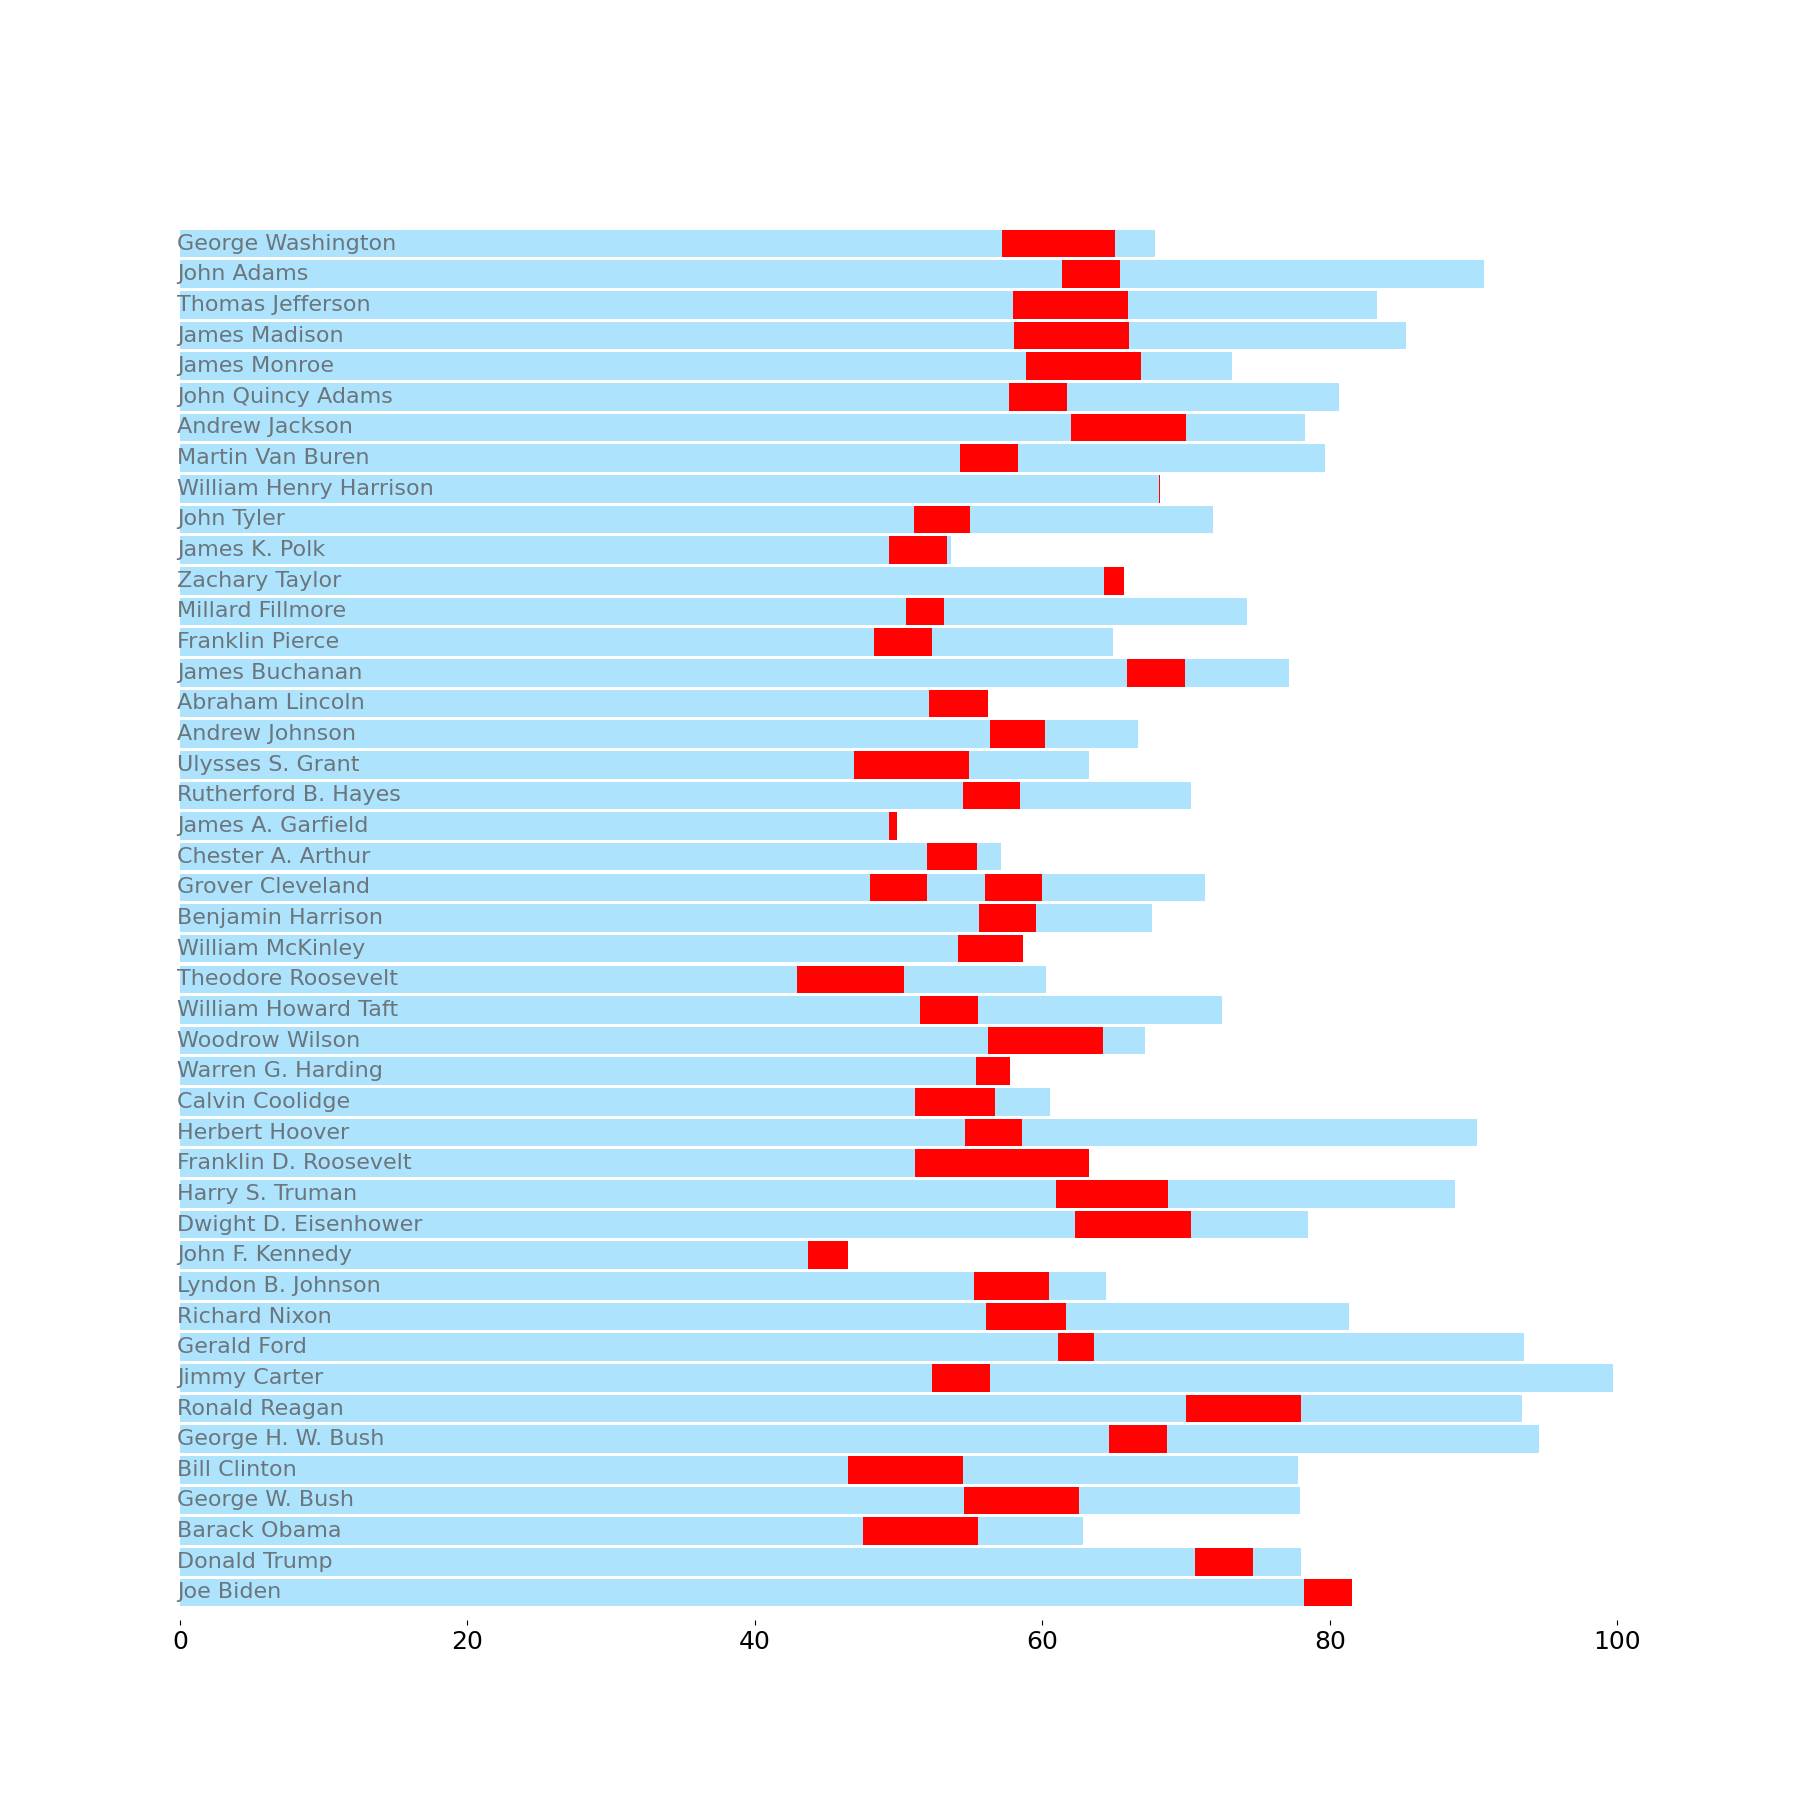

In [22]:
fig.canvas.draw()

bbox = age_bc[0].get_tightbbox()

labelsize = floor((bbox.y1 - bbox.y0) * 0.6)

ax.tick_params(
    axis = 'y',
    labelsize = labelsize,
    pad = 2,
    left = False, labelleft = True, length = 0, labelcolor = "#6B767C",
    labelfontfamily = 'DejaVu Sans',
)

setp(ax.get_yticklabels(), ha = 'left', va = 'center');

display(fig)

### setting up the x-axis

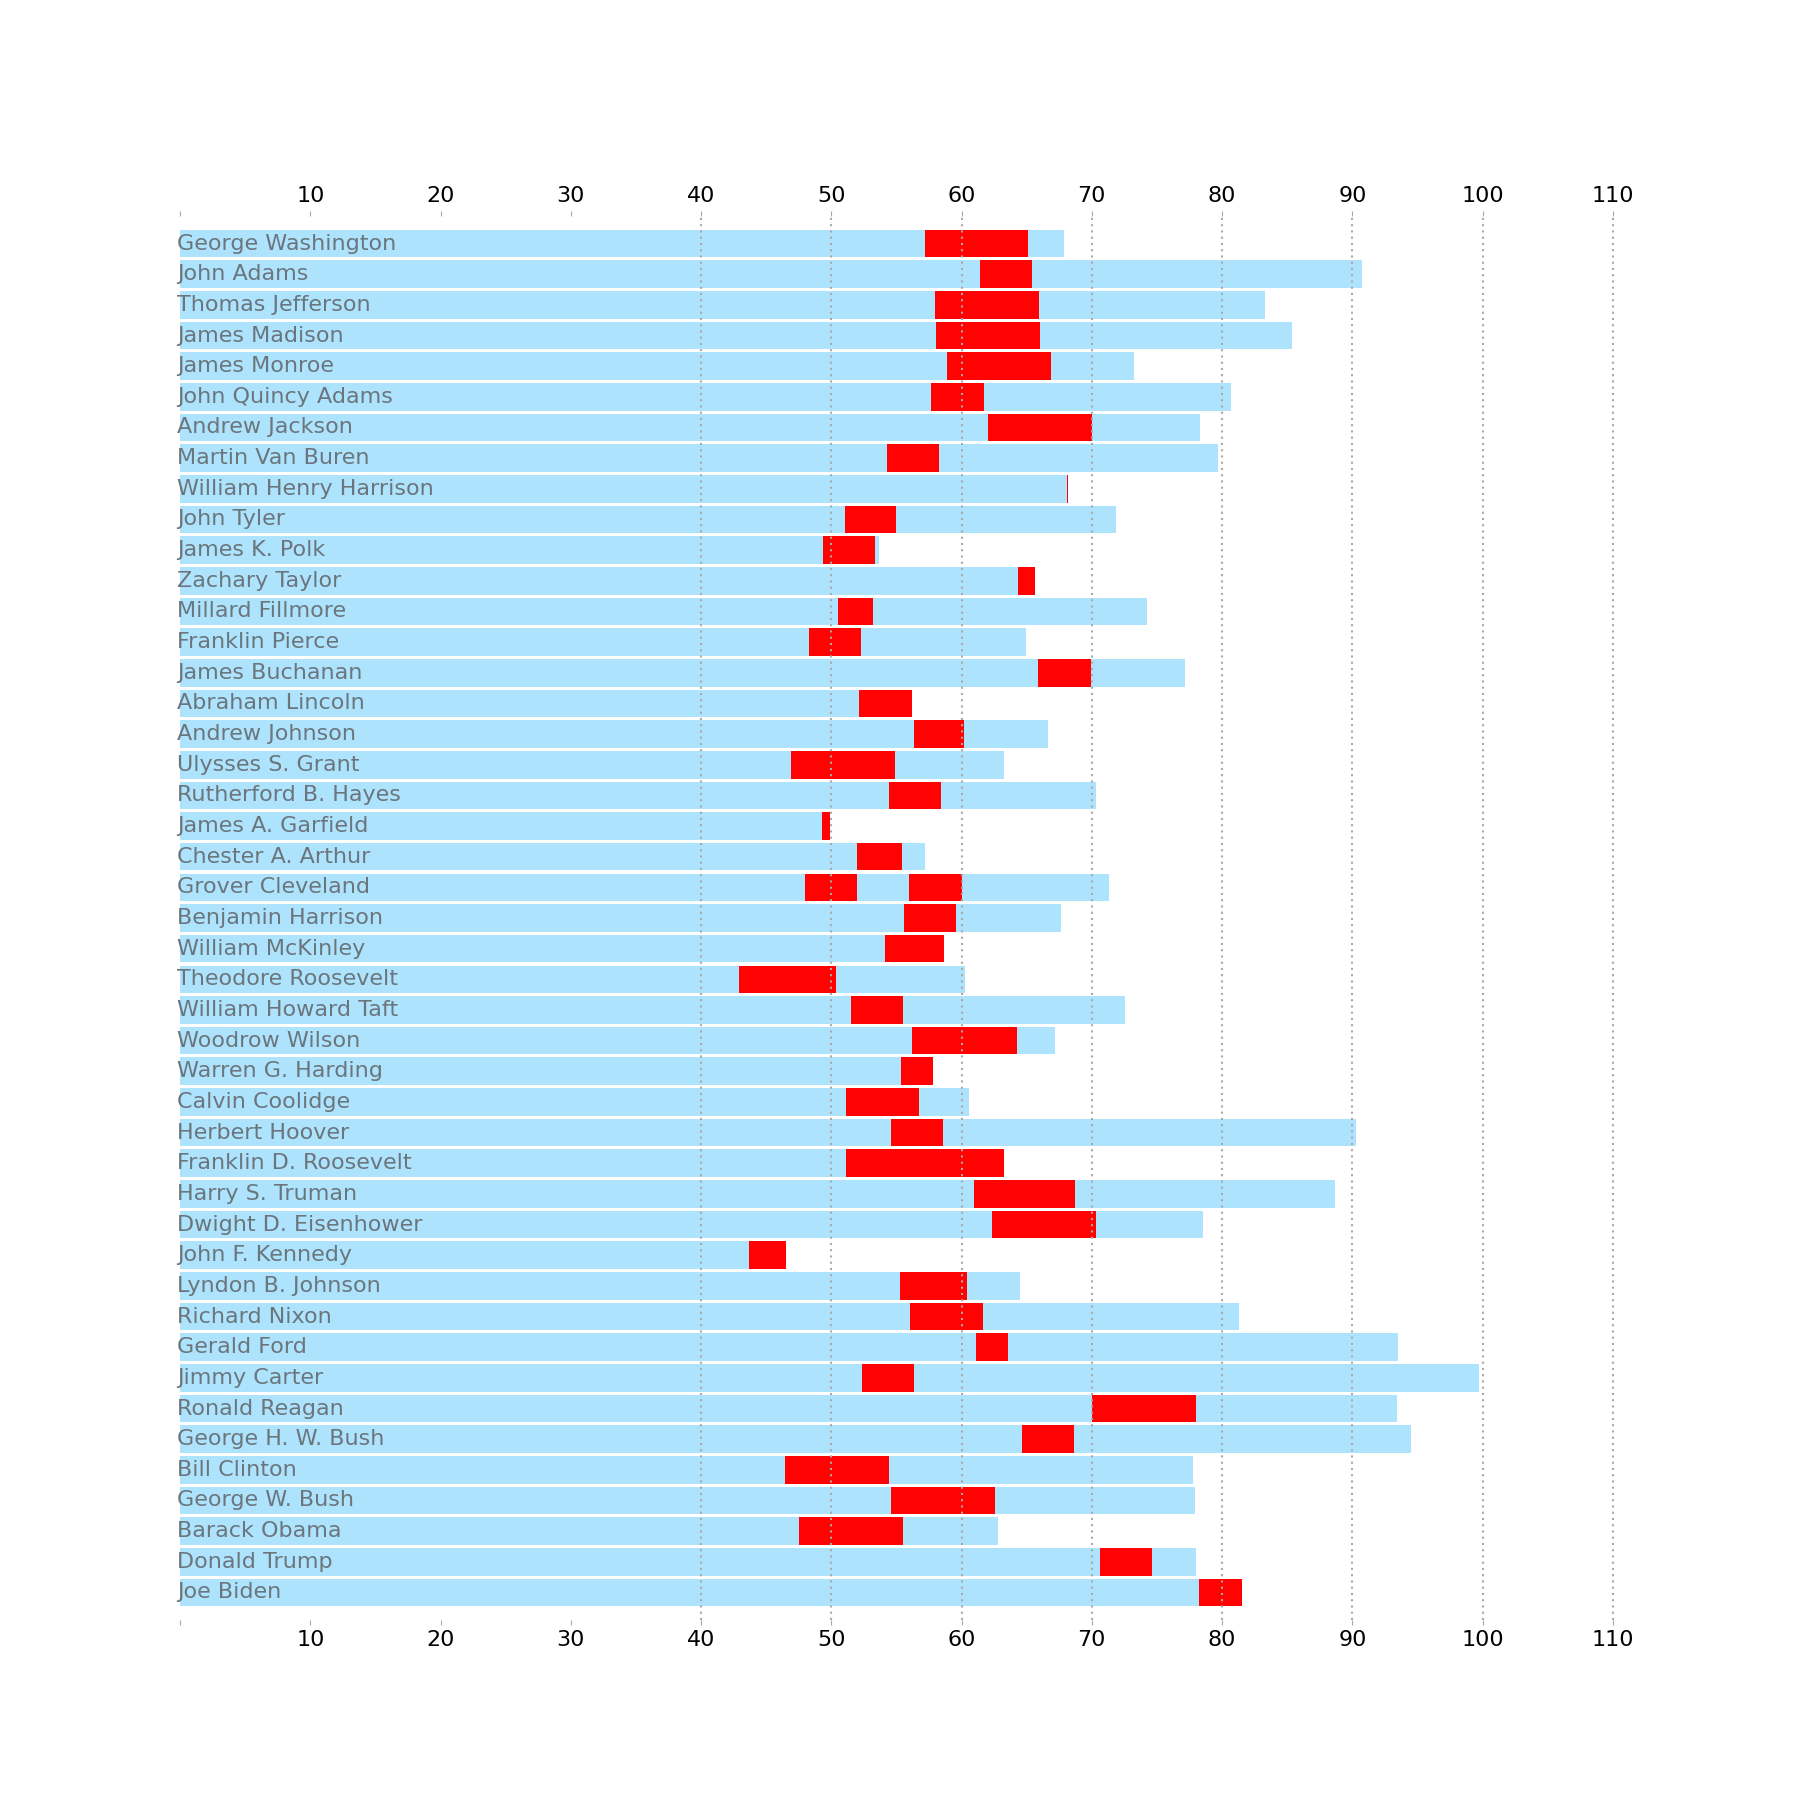

In [24]:
ax.xaxis.set_major_locator(MultipleLocator(10))

ax.xaxis.set_major_formatter(lambda x, pos: '' if x == 0 else f'{x:g}')

ax.vlines(
    [x for x in ax.get_xticks() if x >= 40],
    ymin = 0, ymax = 1,
    transform = ax.get_xaxis_transform(),
    ls = (0, (1, 2)), color = 'darkgray',
)

ax.tick_params(axis = 'x',
               top = True,
               labeltop = True, labelsize = labelsize, color = 'darkgray')

display(fig)

### Coloring the Circles

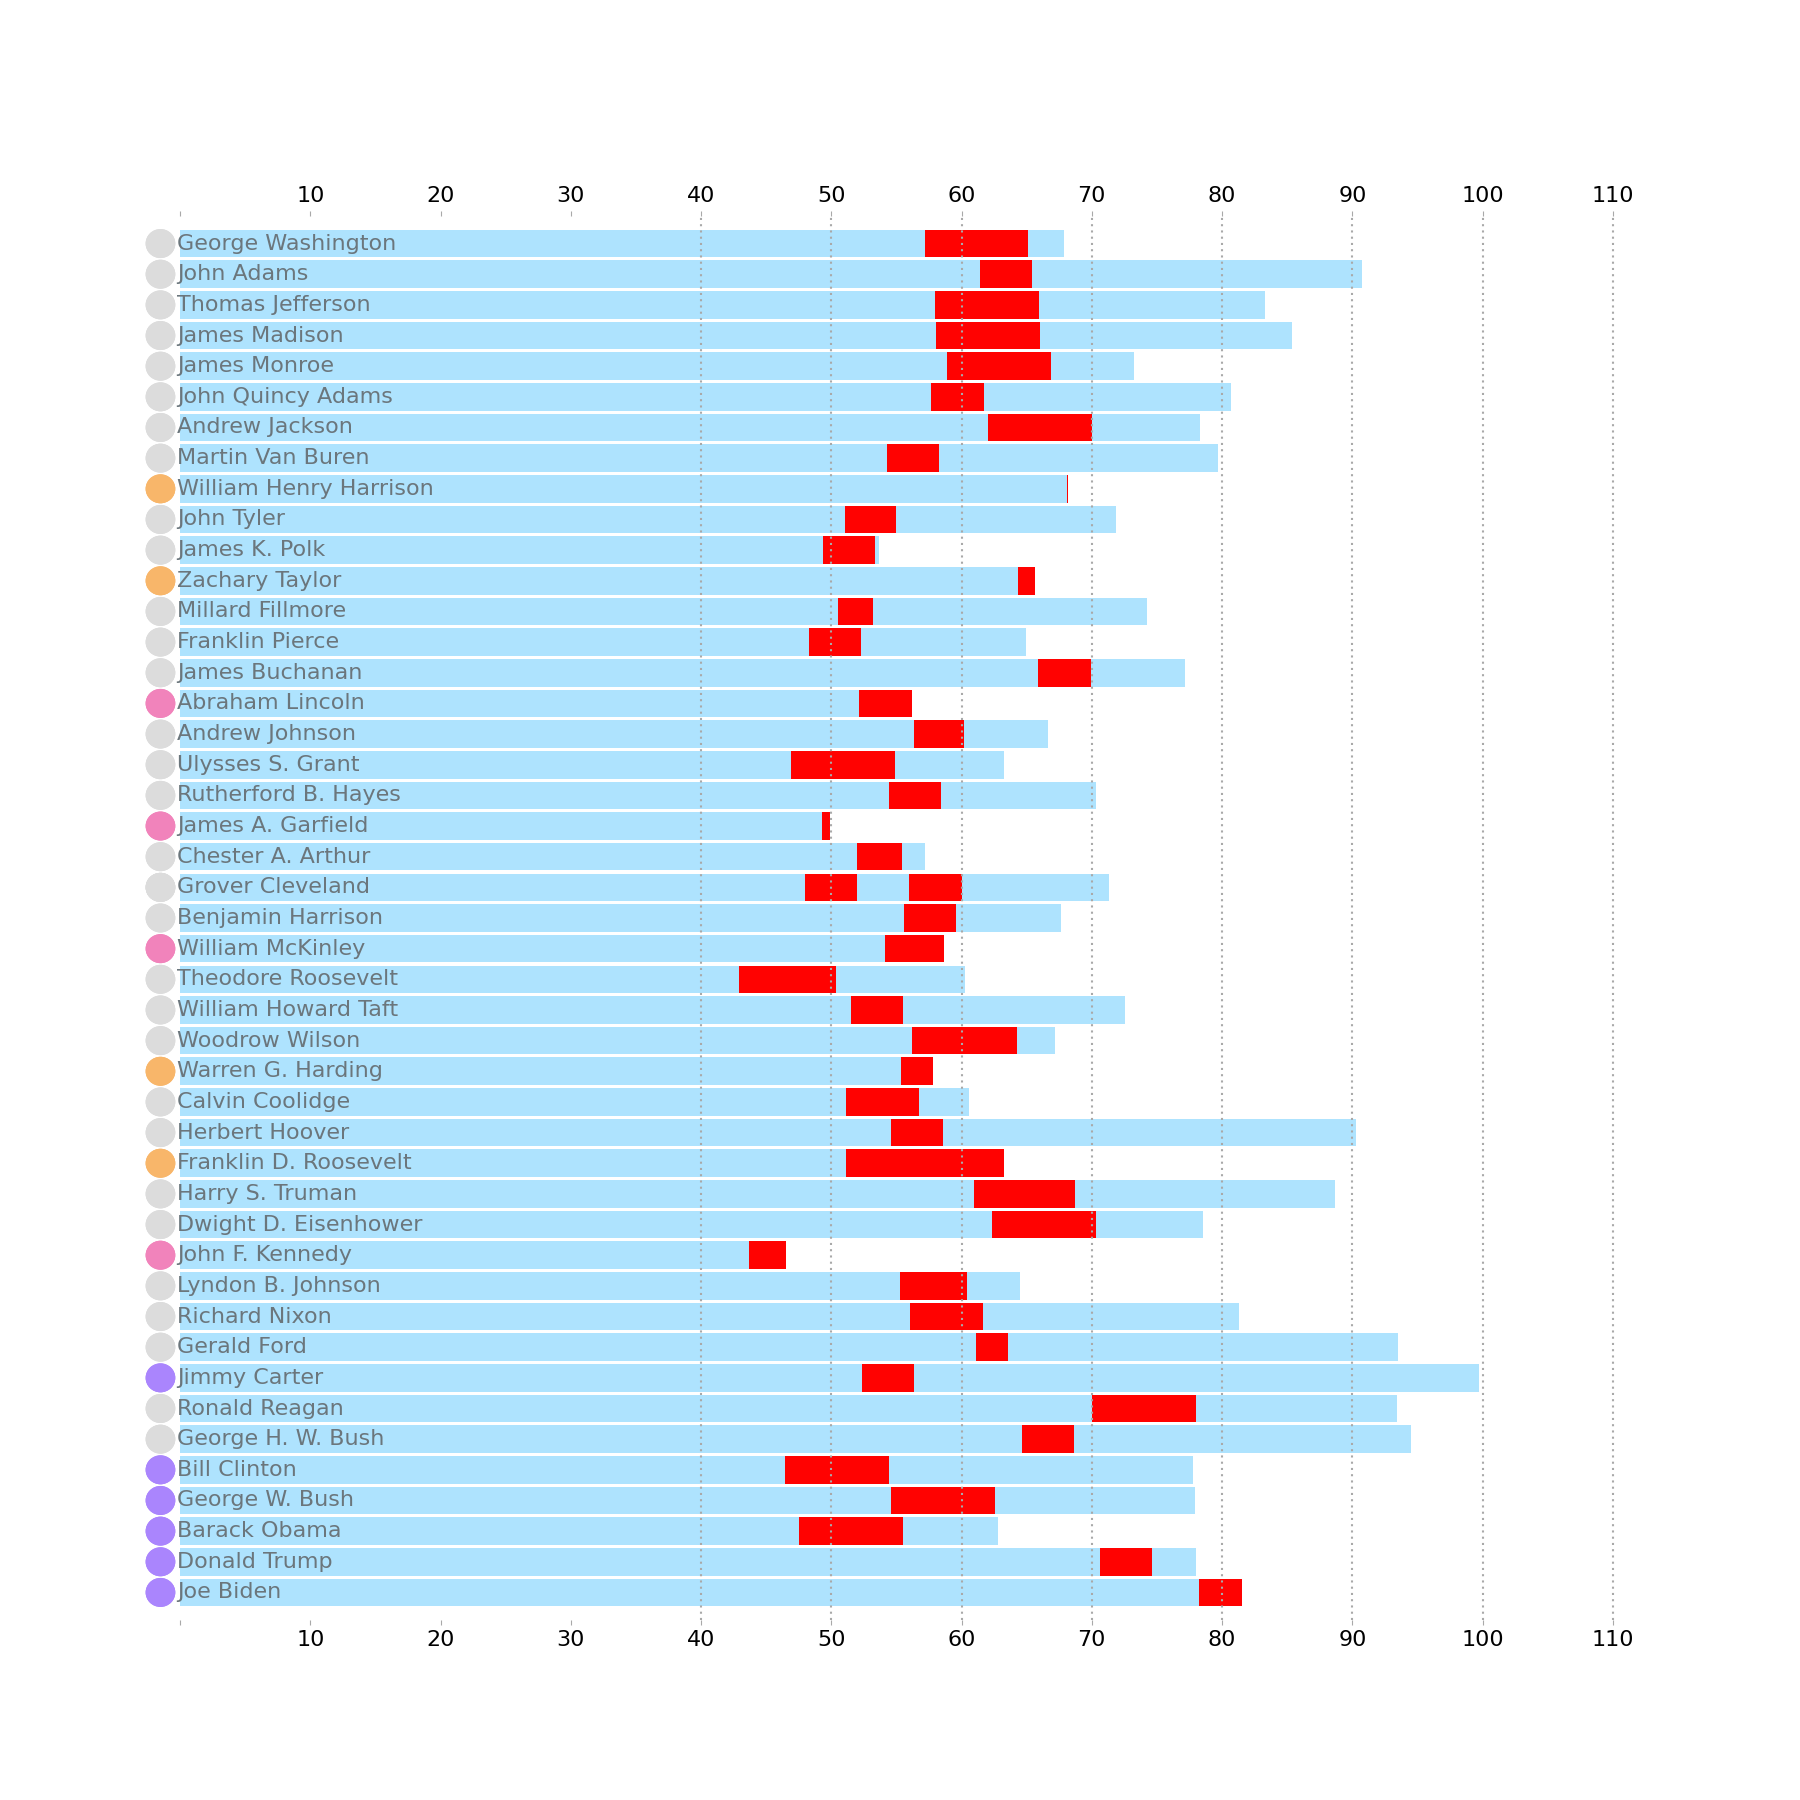

In [26]:
aspect = ax.get_data_ratio()

diameter = age_bc[0].get_height()

width = diameter / aspect 


from matplotlib.patches import Ellipse
for pres, c in zip(p['President'], p['color']):

    ellipse = Ellipse(
        xy = (-1.5, pres), width = width, height = diameter, clip_on = False, color = c
    )

    ax.add_artist(ellipse)

display(fig)

### Indicating whether alive or dead

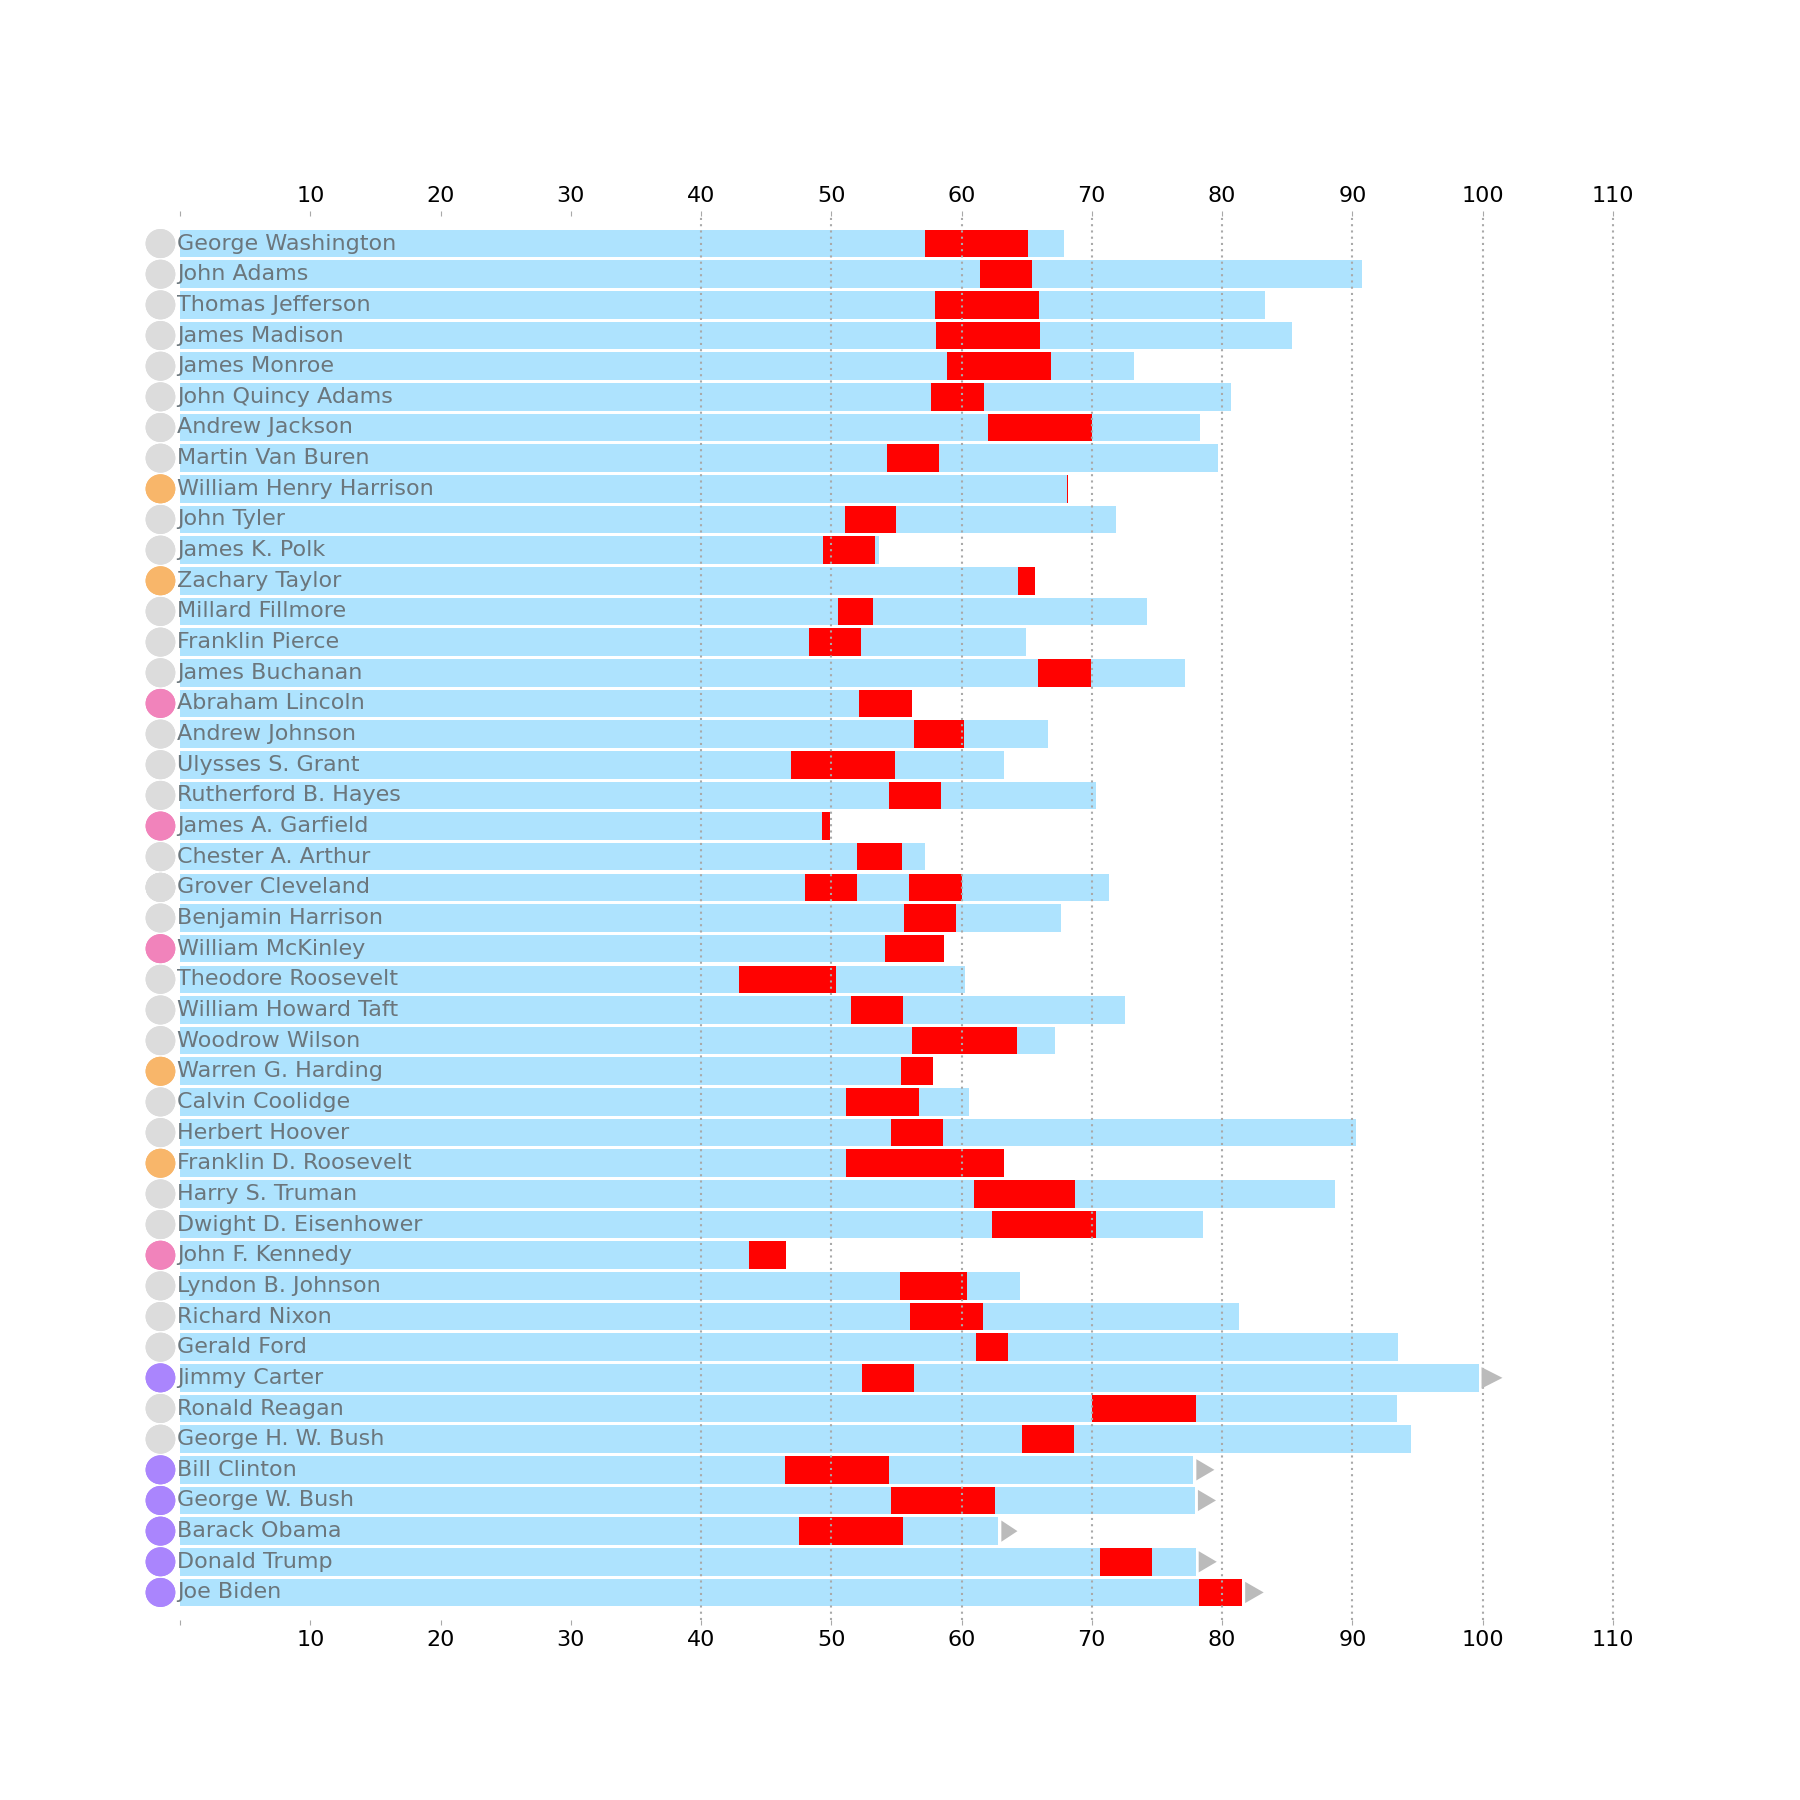

In [27]:
from matplotlib.patches import RegularPolygon, Polygon
from math import pi

ages = p.filter(col('Died').is_null()).select(
    col('President'), 
    ((snapshot_date - col('Born')).dt.total_days() / 365).alias('Age')
)
radius = .4

for pres, age in zip(*ages):
    tri = RegularPolygon(
        (age, ax.convert_yunits(pres)), 
        numVertices=3, 
        radius=radius,
        orientation=-pi/2,
    )
    verts = tri.get_verts()
    verts[:, 0] += (radius * 1.05)
    verts[[0, -1], 0] *= 1.01
    
    tri = Polygon(
        verts,
        facecolor='#bbbbbb',
        clip_on=False,
        zorder=6
    )
    ax.add_patch(tri)
    
display(fig)

### Legends and Titles

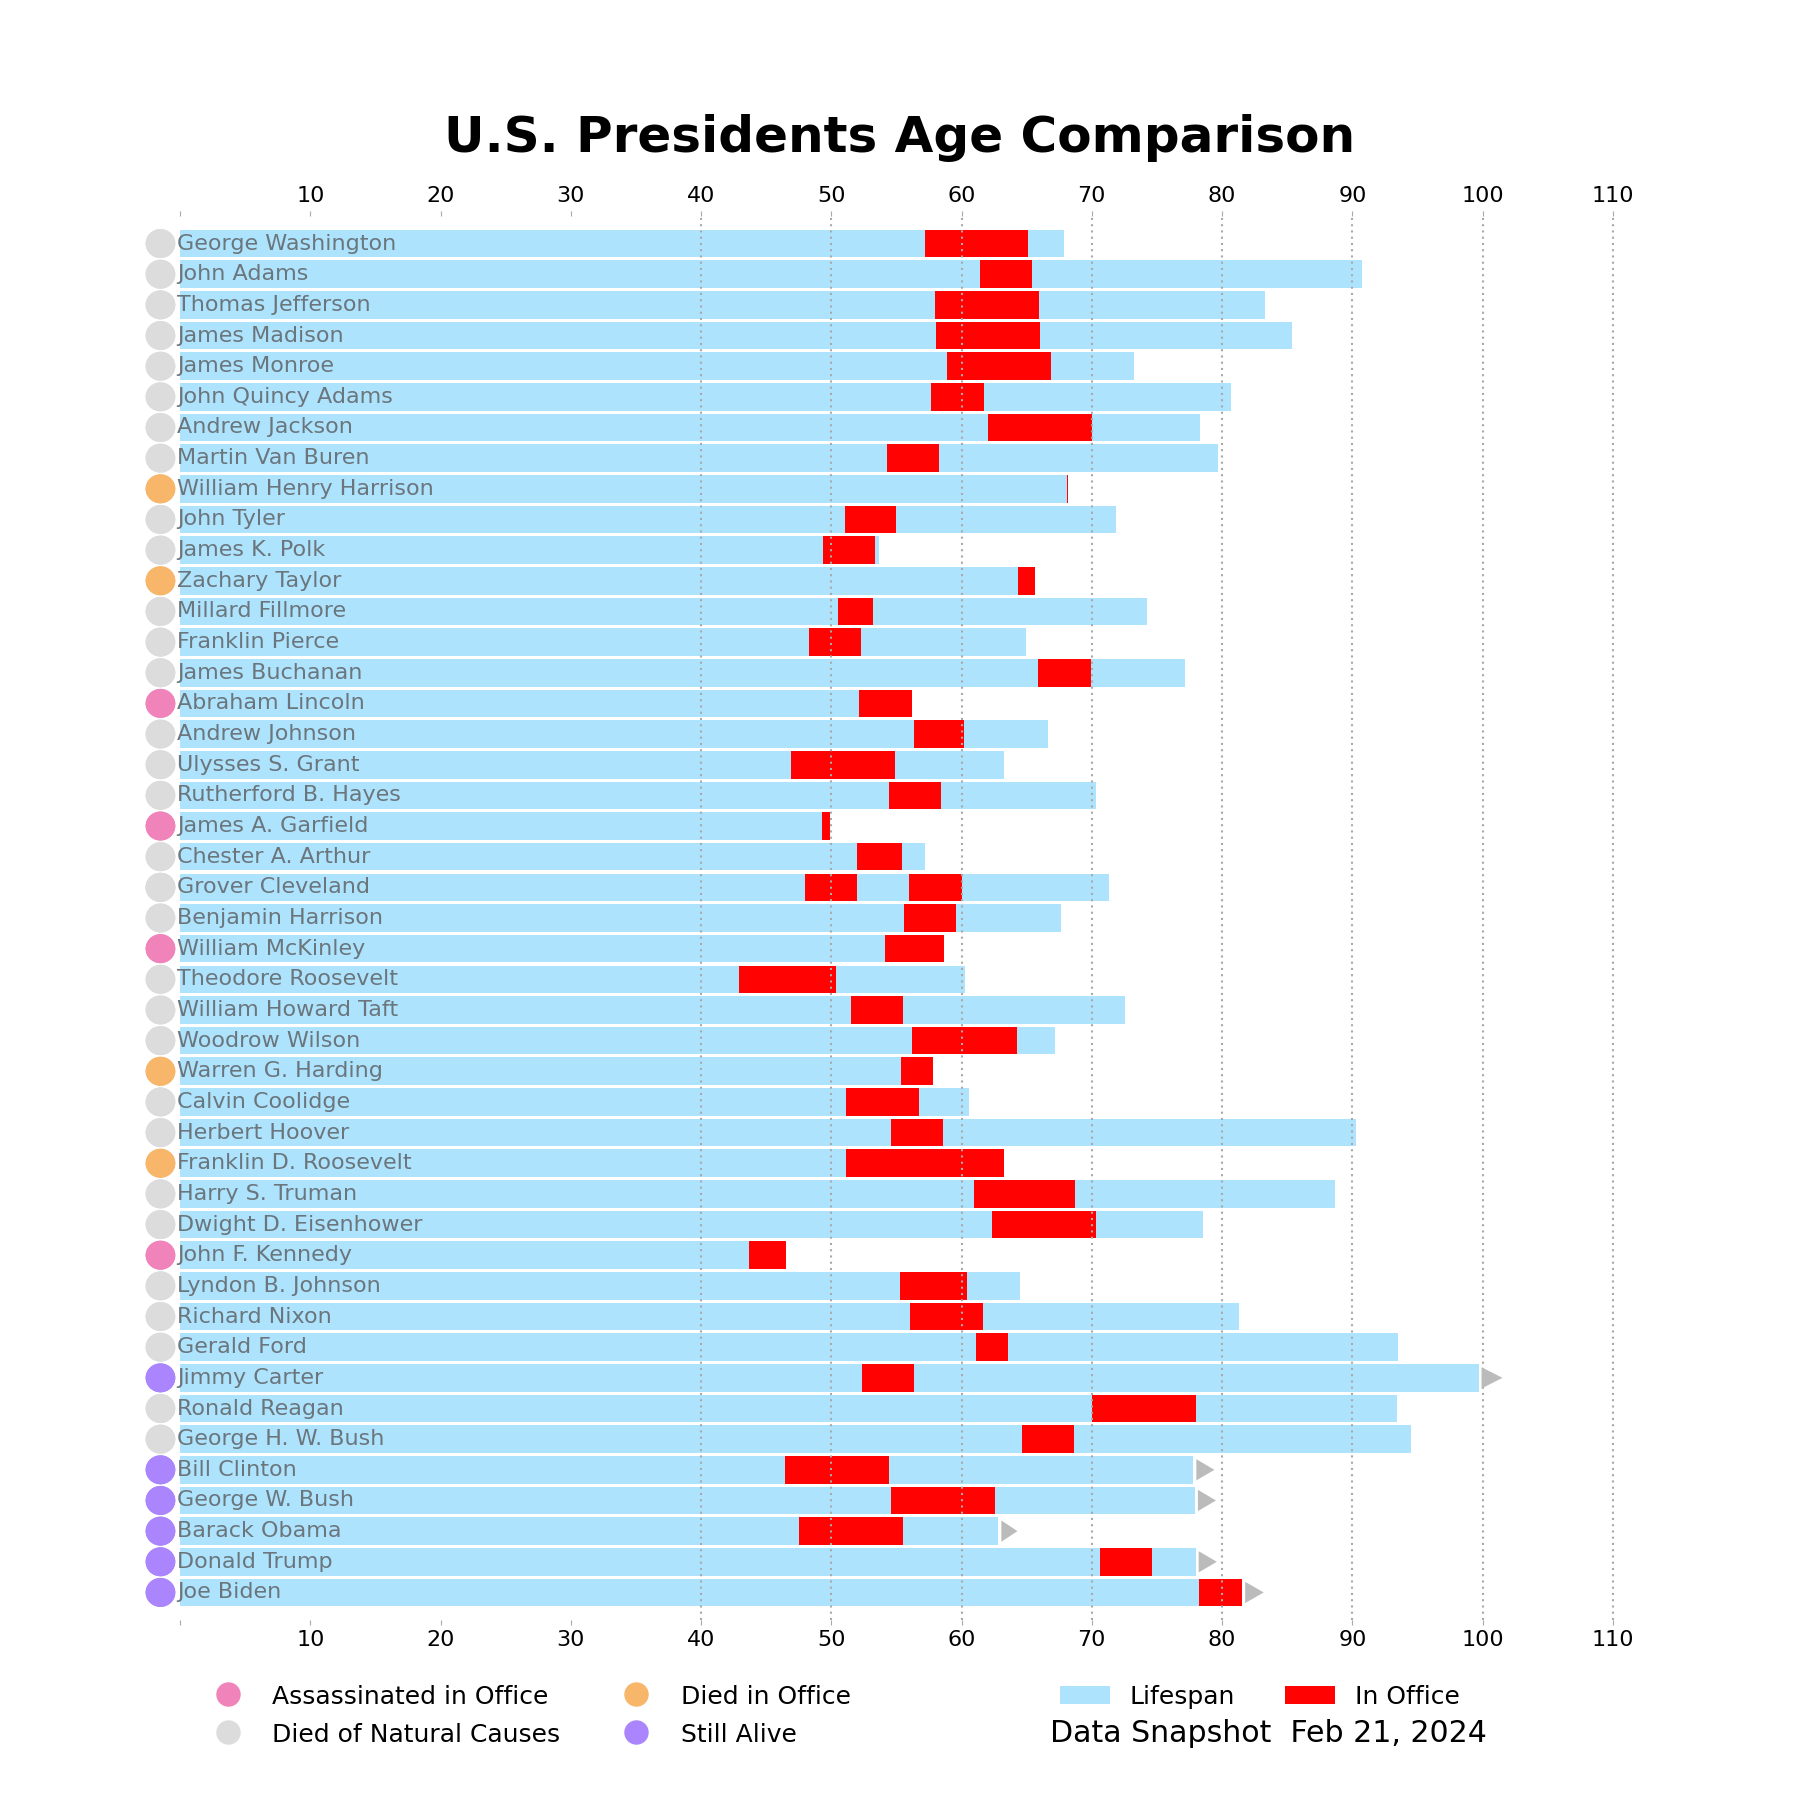

In [28]:
## Circles Legend
from matplotlib.lines import Line2D
order = [
    'Assassinated in Office',
    'Died of Natural Causes', 
    'Died in Office', 
    'Still Alive', 
]
color_map = {k: color for k, (_, color) in circle_exprs.items()}
order_colors = {
    label: color_map[label] for label in order
}

kwargs = dict(
    marker='o', markersize=labelsize*1.1, mec='none', linestyle='none'
)
handles = [
    Line2D([], [], mfc=order_colors[o], **kwargs) for o in order
]
leg = ax.legend(
    labels=order, handles=handles, ncols=2, frameon=False,
    bbox_to_anchor=(0, -.03), loc='upper left', handleheight=1,
)
ax.add_artist(leg)

## Bar Legend
leg = ax.legend(
    labels=['Lifespan', 'In Office'], handles=[age_bc, inoffice_bc], frameon=False,
    bbox_to_anchor=(.75, -.03), loc='upper center', ncols=2,
)
ax.annotate(
    f'Data Snapshot {date(2024, 2, 21): %b %d, %Y}', xy=(0, 0), xycoords=leg, va='top',
    size='large',
)

## Chart Title
ax.set_title(
    'U.S. Presidents Age Comparison', 
    size=36, weight='bold', y=1.04
)



display(fig)

In [29]:
from matplotlib.pyplot import close
close('all')